In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import classification_report ,accuracy_score, roc_auc_score, auc, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
import tensorflow as tf
from tensorflow import keras

In [2]:
s_data= pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [3]:
s_data.head(8)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None


In [4]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                316 non-null    int64  
 1   Gender                   316 non-null    object 
 2   Age                      316 non-null    int64  
 3   Occupation               316 non-null    object 
 4   Sleep Duration           316 non-null    float64
 5   Quality of Sleep         316 non-null    int64  
 6   Physical Activity Level  316 non-null    int64  
 7   Stress Level             316 non-null    int64  
 8   BMI Category             316 non-null    object 
 9   Blood Pressure           316 non-null    object 
 10  Heart Rate               316 non-null    int64  
 11  Daily Steps              316 non-null    int64  
 12  Sleep Disorder           316 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 32.2+ KB


In [5]:
s_data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000
mean,163.272152,40.237342,7.023418,7.151899,60.696203,5.556962,70.518987,6890.822785
std,99.953999,7.989914,0.703611,1.116555,19.469703,1.646521,4.042978,1521.448126
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,79.750000,33.000000,6.400000,6.000000,45.000000,4.000000,68.000000,6000.000000
50%,158.500000,39.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,237.250000,44.000000,7.700000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.300000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [6]:
s_data.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [7]:
#data.drop('Person ID', inplace=True, axis=1)

In [8]:
#Data Analysis with Visualization

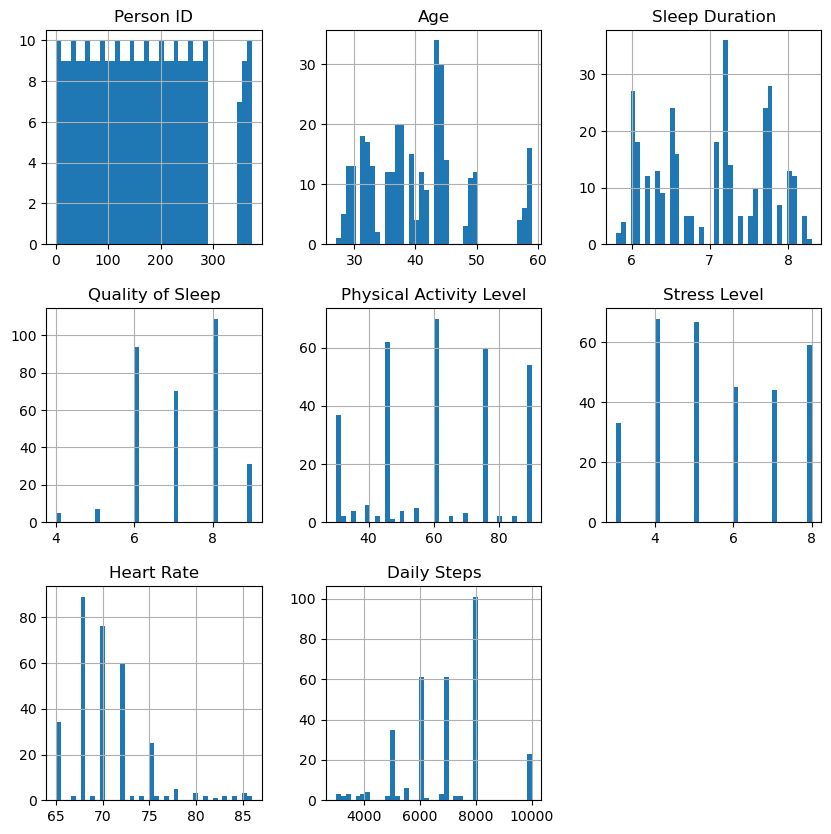

In [9]:
s_data.hist(bins=40, figsize=(10,10))
plt.show()

In [10]:
s_data['Sleep Disorder'].value_counts()

None           185
Insomnia        70
Sleep Apnea     61
Name: Sleep Disorder, dtype: int64

In [11]:
#splitting blood pressure 
#s_data[['Systolic', 'Diastolic']] = s_data['Blood Pressure'].str.split('/', expand=True)

#s_data['Systolic'] = s_data['Systolic'].astype('float')
#s_data['Diastolic'] = s_data['Diastolic'].astype('float')
#s_data2= s_data.drop('Blood Pressure', axis=1, inplace=True)

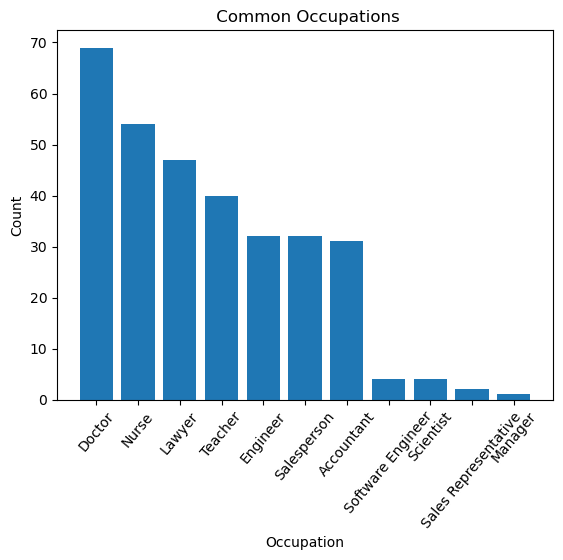

In [12]:
common_occupations = s_data["Occupation"].value_counts()
plt.bar(common_occupations.index, common_occupations)
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.title(" Common Occupations")
plt.xticks(rotation=50)
plt.show()

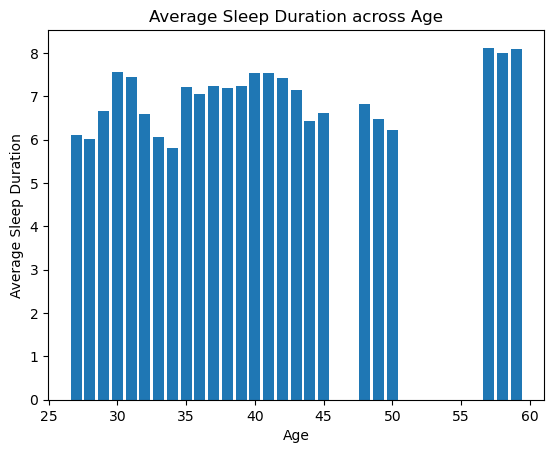

In [13]:
average_sleep_duration = s_data.groupby("Age")["Sleep Duration"].mean()
plt.bar(average_sleep_duration.index, average_sleep_duration )
plt.xlabel("Age" )
plt.ylabel("Average Sleep Duration")
plt.title("Average Sleep Duration across Age")
plt.show()

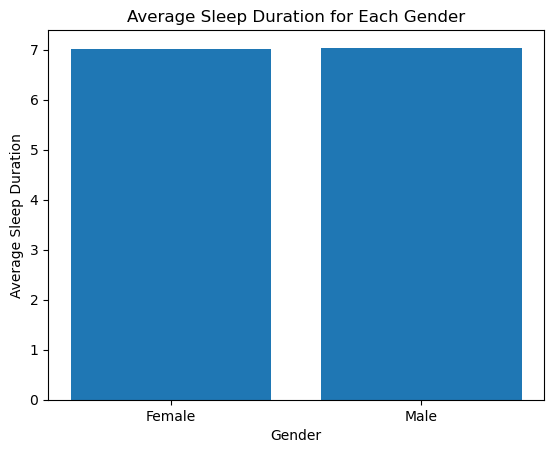

In [14]:
average_sleep_duration = s_data.groupby("Gender")["Sleep Duration"].mean()
plt.bar(average_sleep_duration.index, average_sleep_duration)
plt.xlabel("Gender")
plt.ylabel("Average Sleep Duration")
plt.title("Average Sleep Duration for Each Gender")
plt.show()

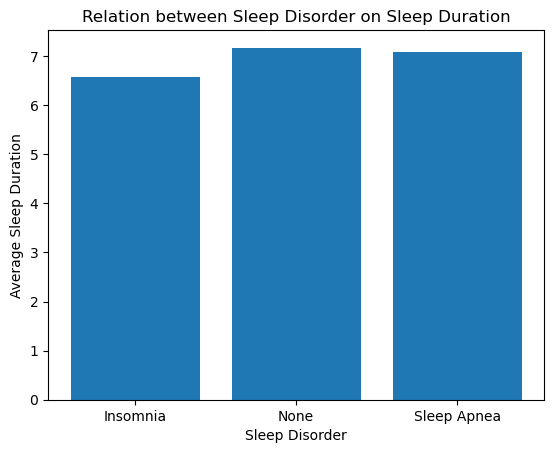

In [15]:
average_sleep_duration = s_data.groupby("Sleep Disorder")["Sleep Duration"].mean().reset_index()
plt.bar(average_sleep_duration["Sleep Disorder"], average_sleep_duration["Sleep Duration"])
plt.xlabel("Sleep Disorder")
plt.ylabel("Average Sleep Duration")
plt.title("Relation between Sleep Disorder on Sleep Duration")
plt.show()

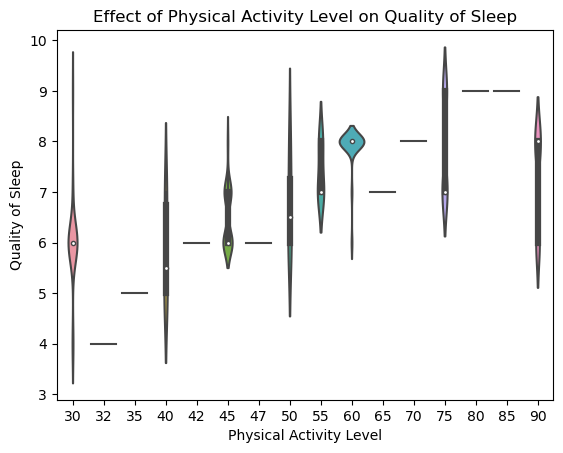

In [16]:
sns.violinplot(x="Physical Activity Level", y="Quality of Sleep", data=s_data)
plt.xlabel("Physical Activity Level")
plt.ylabel("Quality of Sleep")
plt.title("Effect of Physical Activity Level on Quality of Sleep")
plt.show()

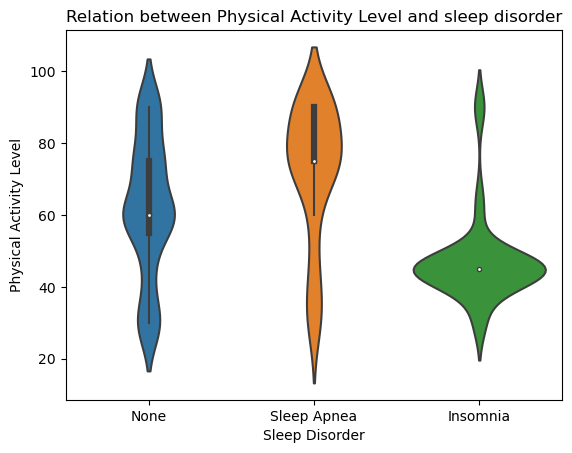

In [17]:
sns.violinplot(y="Physical Activity Level", x="Sleep Disorder", data=s_data)
plt.ylabel("Physical Activity Level")
plt.xlabel("Sleep Disorder")
plt.title("Relation between Physical Activity Level and sleep disorder")
plt.show()

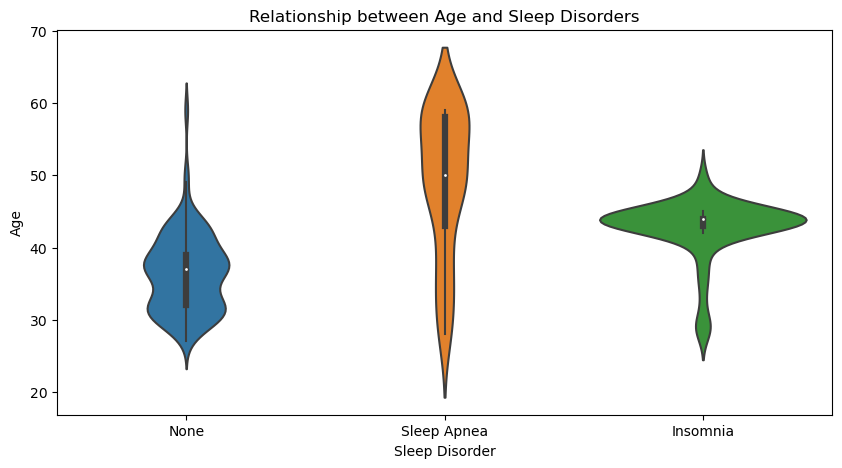

In [18]:
#Relation between sleep disorder and age 
plt.figure(figsize=(10, 5))
sns.violinplot(data=s_data, y="Age", x="Sleep Disorder")
plt.xlabel("Sleep Disorder")
plt.ylabel("Age")
plt.title("Relationship between Age and Sleep Disorders")
plt.show()

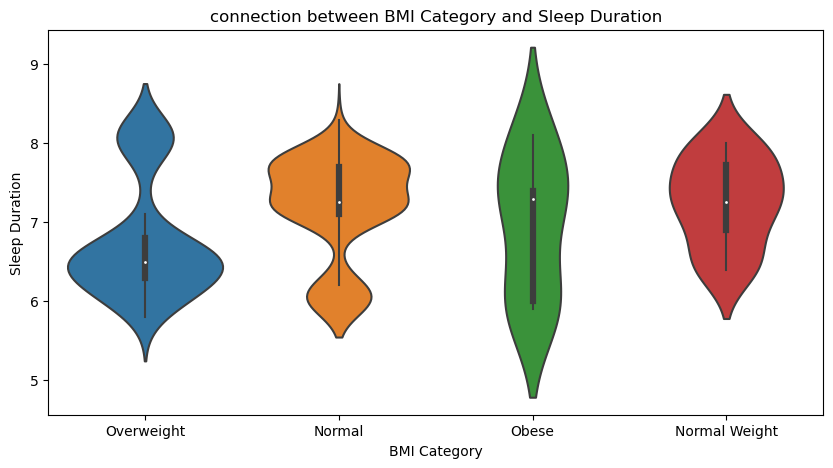

In [19]:
#Relation between BMI and sleep duration 
plt.figure(figsize=(10, 5))
sns.violinplot(data=s_data, x="BMI Category", y="Sleep Duration")
plt.xlabel("BMI Category")
plt.ylabel("Sleep Duration")
plt.title("connection between BMI Category and Sleep Duration")
plt.show()

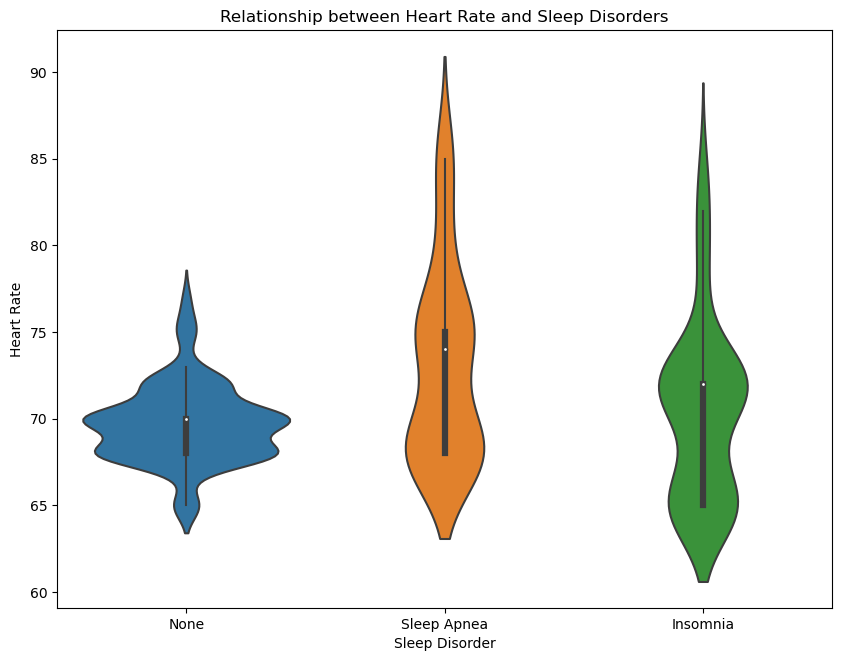

In [20]:
#Reltaion between heart rate and sleep disorder 
plt.figure(figsize=(10, 7.5))
sns.violinplot(data=s_data, x="Sleep Disorder", y="Heart Rate")
plt.xlabel("Sleep Disorder")
plt.ylabel("Heart Rate")
plt.title("Relationship between Heart Rate and Sleep Disorders")
plt.show()

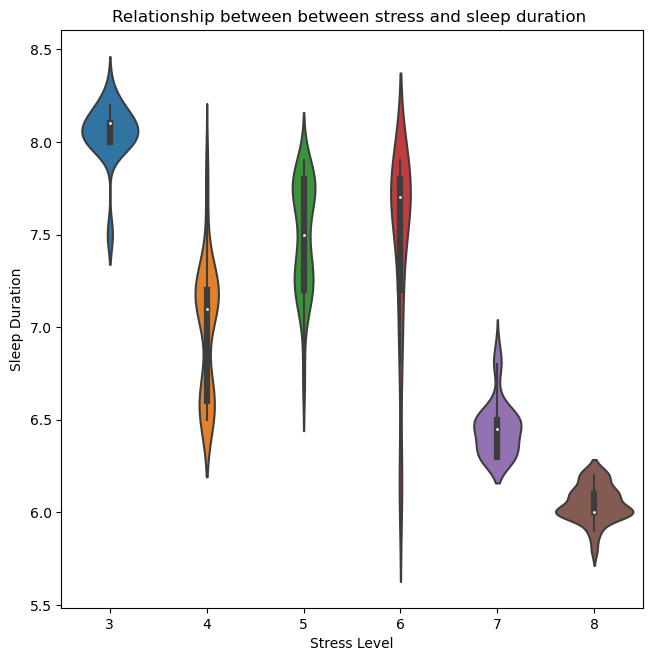

In [21]:
#Reltaion between stress and sleep duration 
plt.figure(figsize=(7.5, 7.5))
sns.violinplot(data=s_data, y="Sleep Duration", x="Stress Level")
plt.ylabel("Sleep Duration")
plt.xlabel("Stress Level")
plt.title("Relationship between between stress and sleep duration ")
plt.show()

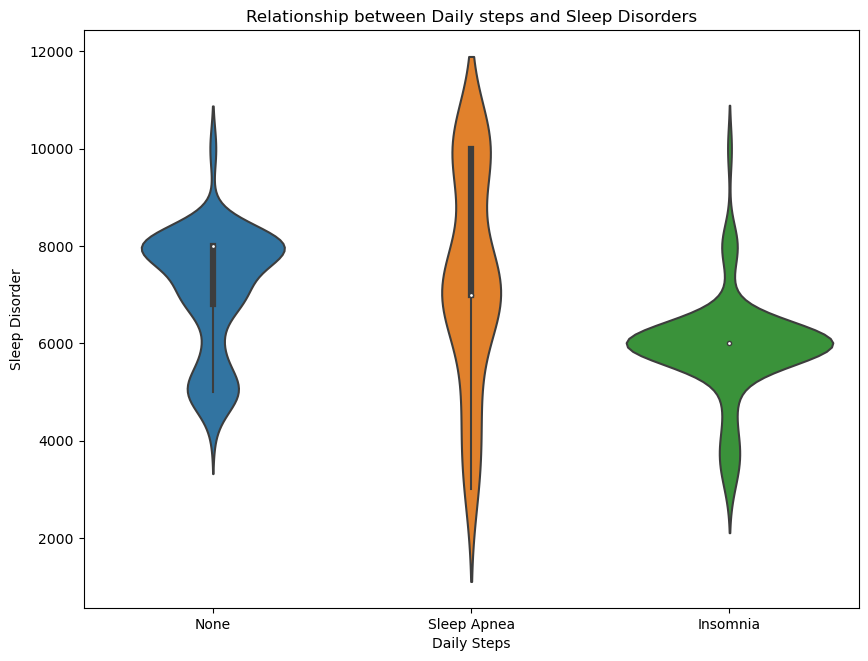

In [22]:
#Reltaion between blood pressure and sleep disorder 
plt.figure(figsize=(10, 7.5))
sns.violinplot(data=s_data, x="Sleep Disorder", y="Daily Steps")
plt.ylabel("Sleep Disorder")
plt.xlabel("Daily Steps")
plt.title("Relationship between Daily steps and Sleep Disorders")
plt.show()

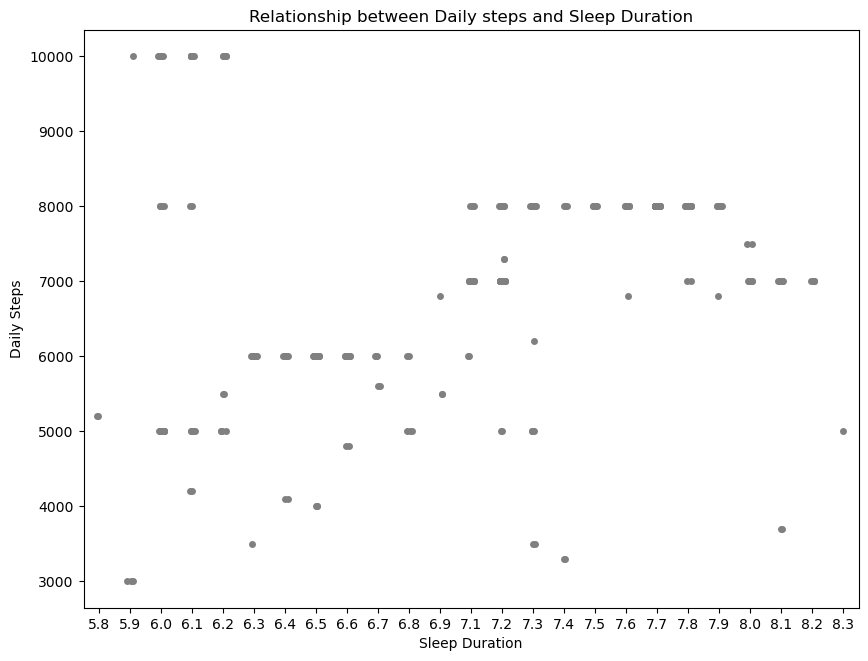

In [23]:
#Reltaion between blood pressure and sleep duration 
plt.figure(figsize=(10, 7.5))
sns.stripplot(data=s_data, x="Sleep Duration", y="Daily Steps" ,color='.5')
plt.xlabel("Sleep Duration")
plt.ylabel("Daily Steps")
plt.title("Relationship between Daily steps and Sleep Duration")
plt.show()

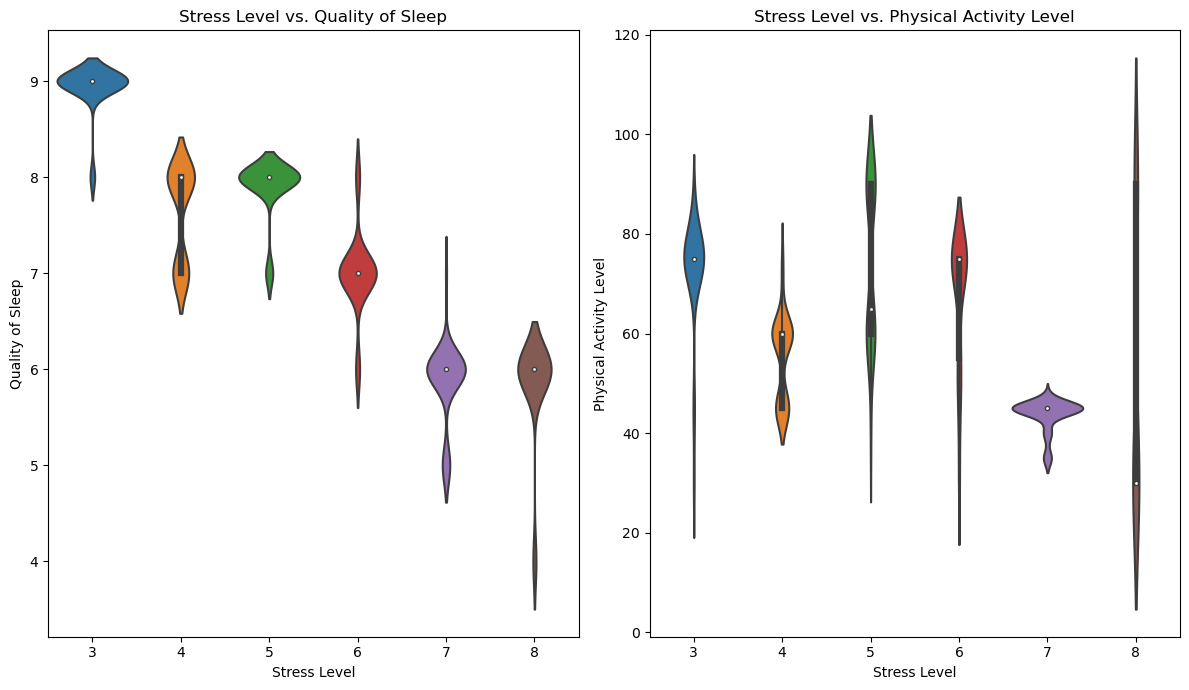

In [24]:
# Stress level affecting sleep quality and physical activity level 
plt.figure(figsize=(12, 7))
plt.subplot(1, 2, 1)
sns.violinplot(data=s_data, x="Stress Level", y="Quality of Sleep")
plt.xlabel("Stress Level")
plt.ylabel("Quality of Sleep")
plt.title("Stress Level vs. Quality of Sleep")

plt.subplot(1, 2, 2)
sns.violinplot(data=s_data, x="Stress Level", y="Physical Activity Level")
plt.xlabel("Stress Level")
plt.ylabel("Physical Activity Level")
plt.title("Stress Level vs. Physical Activity Level")

plt.tight_layout()
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_3544\2871398594.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = s_data.corr()


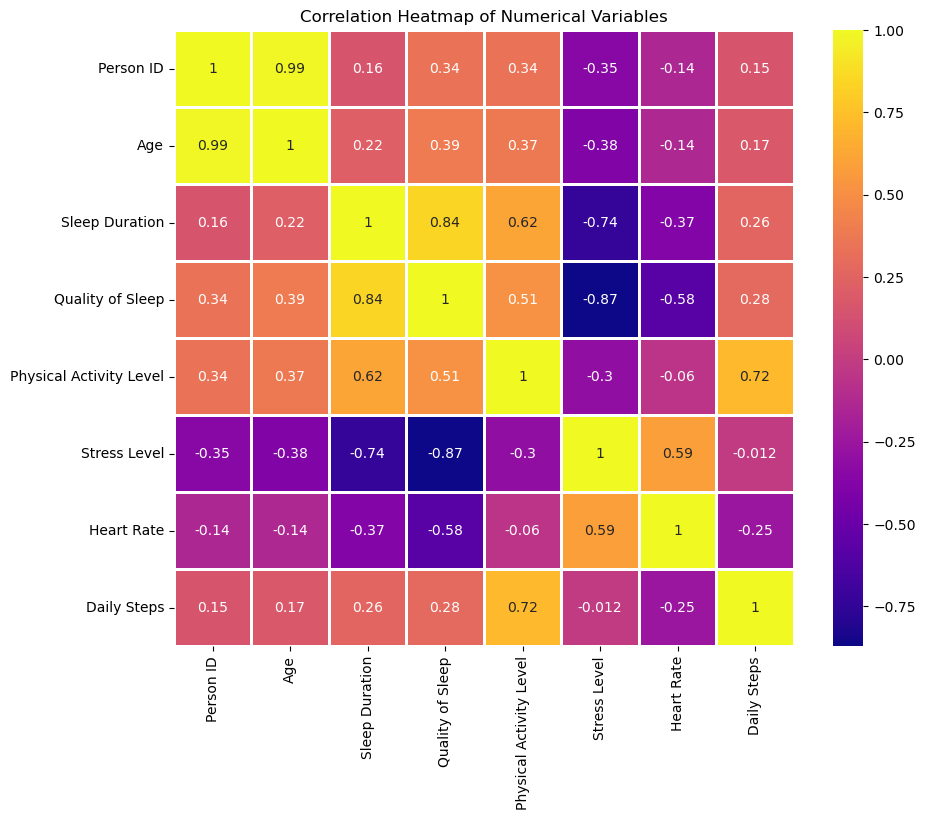

In [25]:
# Create a heatmap
corr_matrix = s_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="plasma", linewidths=1)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

In [26]:
#data cleaning and preprocessing

In [27]:
s_data.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None


In [28]:
s_data.drop('Person ID', inplace=True, axis=1)

In [29]:
# Removing outliers
cols = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
           'Heart Rate', 'Daily Steps', 'Blood Pressure']
Q1 = s_data[cols].quantile(0.25)
Q3 = s_data[cols].quantile(0.75)
IQR = Q3 - Q1
s_data = s_data[~((s_data[cols] < (Q1 - 1.5 * IQR)) |
                          (s_data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\pc\AppData\Local\Temp\ipykernel_3544\2489806759.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = s_data[cols].quantile(0.25)
C:\Users\pc\AppData\Local\Temp\ipykernel_3544\2489806759.py:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = s_data[cols].quantile(0.75)
C:\Users\pc\AppData\Local\Temp\ipykernel_3544\2489806759.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  s_data = s_data[~((s_data[cols] < (Q1 - 1.5 * IQR)) |
C:\Users\pc\AppData\Local\

In [30]:
s_data[['Age','Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level','Heart Rate', 'Daily Steps', 'Blood Pressure']] = \
s_data[['Age','Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level','Heart Rate', 'Daily Steps', 'Blood Pressure']].apply(pd.factorize).iloc[0]

In [31]:
label_en= LabelEncoder()
s_data['Gender'] = label_en.fit_transform(s_data['Gender'])
s_data['Occupation'] = label_en.fit_transform(s_data['Occupation'])
s_data['BMI Category'] = label_en.fit_transform(s_data['BMI Category'])
print(s_data.head())

   Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
0       1    0           8               0                 0   
1       1    1           1               1                 0   
2       1    1           1               1                 0   
7       1    2           1               2                 1   
8       1    2           1               2                 1   

   Physical Activity Level  Stress Level  BMI Category  Blood Pressure  \
0                        0             0             2               0   
1                        1             1             0               1   
2                        1             1             0               1   
7                        2             0             0               2   
8                        2             0             0               2   

   Heart Rate  Daily Steps Sleep Disorder  
0           0            0           None  
1           1            1           None  
2           1            1           N

In [32]:

print(s_data.head())

   Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
0       1    0           8               0                 0   
1       1    1           1               1                 0   
2       1    1           1               1                 0   
7       1    2           1               2                 1   
8       1    2           1               2                 1   

   Physical Activity Level  Stress Level  BMI Category  Blood Pressure  \
0                        0             0             2               0   
1                        1             1             0               1   
2                        1             1             0               1   
7                        2             0             0               2   
8                        2             0             0               2   

   Heart Rate  Daily Steps Sleep Disorder  
0           0            0           None  
1           1            1           None  
2           1            1           N

In [33]:
s_data.head(10)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,0,8,0,0,0,0,2,0,0,0,None
1,1,1,1,1,0,1,1,0,1,1,1,None
2,1,1,1,1,0,1,1,0,1,1,1,None
7,1,2,1,2,1,2,0,0,2,2,2,None
8,1,2,1,2,1,2,0,0,2,2,2,None
9,1,2,1,2,1,2,0,0,2,2,2,None
10,1,2,1,0,0,3,1,0,2,2,2,None
11,1,2,1,2,1,2,0,0,2,2,2,None
12,1,2,1,0,0,3,1,0,2,2,2,None
13,1,2,1,3,0,3,1,0,2,2,2,None


In [34]:
s_data.duplicated()

0      False
1      False
2       True
7      False
8       True
       ...  
311     True
312     True
313     True
314     True
315     True
Length: 301, dtype: bool

In [35]:
s_data.drop_duplicates()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,0,8,0,0,0,0,2,0,0,0,None
1,1,1,1,1,0,1,1,0,1,1,1,None
7,1,2,1,2,1,2,0,0,2,2,2,None
10,1,2,1,0,0,3,1,0,2,2,2,None
13,1,2,1,3,0,3,1,0,2,2,2,None
...,...,...,...,...,...,...,...,...,...,...,...,...
300,0,23,5,16,4,2,4,2,17,6,6,None
301,0,23,5,23,4,2,4,2,17,6,6,None
302,0,23,5,22,4,2,4,2,17,6,6,Sleep Apnea
306,0,23,5,16,4,2,4,2,17,6,6,Sleep Apnea


In [36]:
x = s_data.drop(['Sleep Disorder'], axis=1)
y = s_data['Sleep Disorder']


In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)
print('x_train shape: ', x_train.shape)
print('x_test shape: ', x_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (210, 11)
x_test shape:  (91, 11)
y_train shape:  (210,)
y_test shape:  (91,)


In [38]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_train)

x_train = scaler.transform(x_train)

x_test = scaler.transform(x_test)


In [39]:
x_train 

array([[ 0.83279553, -0.18369383, -0.24453751, ...,  0.14303067,
         0.63715937, -0.84062484],
       [ 0.83279553, -0.34996842, -0.24453751, ...,  0.14303067,
         0.63715937, -0.84062484],
       [-1.20077494, -0.6825176 ,  1.89516572, ..., -0.23009282,
         0.63715937,  0.10846772],
       ...,
       [-1.20077494,  1.81160123,  0.4686969 , ...,  1.44896287,
         0.63715937,  0.10846772],
       [-1.20077494, -0.51624301, -1.31438913, ..., -0.23009282,
         0.63715937,  0.10846772],
       [ 0.83279553,  0.48140452,  0.8253141 , ...,  0.14303067,
         0.21103368,  1.7693797 ]])

In [40]:

#model creation 

In [41]:
rfc= RandomForestClassifier()
param_grid = {
   'n_estimators': np.arange(1, 32),
    'max_depth': [None , 10, 20, 30, 40, 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [ 10, 20, 30,'sqrt','log2'],
    'criterion' : ['entropy','gini']
}

In [42]:
model_name = "Random Forest Classifier"

In [43]:
grid_s = GridSearchCV(rfc, param_grid, cv=7, scoring='accuracy',return_train_score = True, n_jobs=-1)

In [44]:
grid_s.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [None, 10, 20, 30, 40, 100],
                         'max_features': [10, 20, 30, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])},
             return_train_score=True, scoring='accuracy')

In [45]:
grid_s.cv_results_

{'mean_fit_time': array([0.01196766, 0.00783604, 0.0189492 , ..., 0.04032043, 0.03661646,
        0.04074815]),
 'std_fit_time': array([0.01634388, 0.00374802, 0.00842877, ..., 0.00690677, 0.00259598,
        0.00769616]),
 'mean_score_time': array([0.00213708, 0.00199492, 0.00356191, ..., 0.00313442, 0.00356184,
        0.00370458]),
 'std_score_time': array([0.00034889, 0.00092321, 0.00231459, ..., 0.00034907, 0.00049357,
        0.00087812]),
 'param_criterion': masked_array(data=['entropy', 'entropy', 'entropy', ..., 'gini', 'gini',
                    'gini'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[None, None, None, ..., 100, 100, 100],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=[10, 10, 10, ..., 'log2', 'log2', 'log2'],
              mask=[False,

In [46]:
rfc_best_params = grid_s.best_params_
print("Best Parameters:", rfc_best_params)

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 29}


In [82]:
rfc = RandomForestClassifier(n_estimators=25 ,max_depth=None , criterion='entropy',max_features='log2',
                              min_samples_split=10, min_samples_leaf=4,  random_state=65, 
                            )
rfc.fit(x_train,y_train)
print(rfc.fit(x_train,y_train))

RandomForestClassifier(criterion='entropy', max_features='log2',
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=25, random_state=65)


In [83]:
rfc.fit(x_train, y_train)  

RandomForestClassifier(criterion='entropy', max_features='log2',
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=25, random_state=65)

In [84]:
print(rfc.score(x_train,y_train))

0.9142857142857143


In [85]:
print(rfc.score(x_test,y_test))

0.9010989010989011


In [86]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rfc.predict(x_test)))


              precision    recall  f1-score   support

    Insomnia       0.95      0.79      0.86        24
        None       0.90      0.95      0.92        58
 Sleep Apnea       0.80      0.89      0.84         9

    accuracy                           0.90        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.90      0.90      0.90        91



In [87]:
x_train

array([[ 0.83279553, -0.18369383, -0.24453751, ...,  0.14303067,
         0.63715937, -0.84062484],
       [ 0.83279553, -0.34996842, -0.24453751, ...,  0.14303067,
         0.63715937, -0.84062484],
       [-1.20077494, -0.6825176 ,  1.89516572, ..., -0.23009282,
         0.63715937,  0.10846772],
       ...,
       [-1.20077494,  1.81160123,  0.4686969 , ...,  1.44896287,
         0.63715937,  0.10846772],
       [-1.20077494, -0.51624301, -1.31438913, ..., -0.23009282,
         0.63715937,  0.10846772],
       [ 0.83279553,  0.48140452,  0.8253141 , ...,  0.14303067,
         0.21103368,  1.7693797 ]])

In [88]:
x_test

array([[-1.20077494,  0.8139537 ,  1.89516572, ...,  1.07583938,
         1.48941076,  1.7693797 ],
       [-1.20077494, -0.51624301,  0.4686969 , ..., -1.72258676,
        -1.9195948 , -1.31517112],
       [ 0.83279553,  0.48140452, -0.60115472, ...,  0.14303067,
        -1.06734341, -0.84062484],
       ...,
       [-1.20077494, -0.51624301, -1.31438913, ..., -0.23009282,
         0.63715937,  0.10846772],
       [-1.20077494,  1.81160123,  0.4686969 , ...,  1.44896287,
         0.63715937,  0.10846772],
       [ 0.83279553, -0.18369383, -0.24453751, ...,  0.14303067,
         0.63715937, -0.84062484]])

In [89]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
def rocAuc(model, Xtest, ytest, model_name):
    cols = model.classes_
    y_test_binarized = pd.get_dummies(ytest, prefix=['Class'])
    try:
        score = model.decision_function(Xtest)
    except:
        score = model.predict_proba(Xtest)
    
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(len(model.classes_)):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized.iloc[:,i],score[:,i])
        roc_auc[i] = auc(fpr[i],tpr[i])
        
    plt.figure(figsize=(7,7))
    for i in range(len(model.classes_)):
        plt.plot(fpr[i],tpr[i], label=f'{cols[i]}-vs-Rest curve (area = %0.2f)' % roc_auc[i])
    
    plt.plot([0,1],[0,1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel('True Positive Rate')
    plt.title(f"{model_name} Receiver Operation Characteristic")
    plt.legend(loc='lower right')
    plt.show()

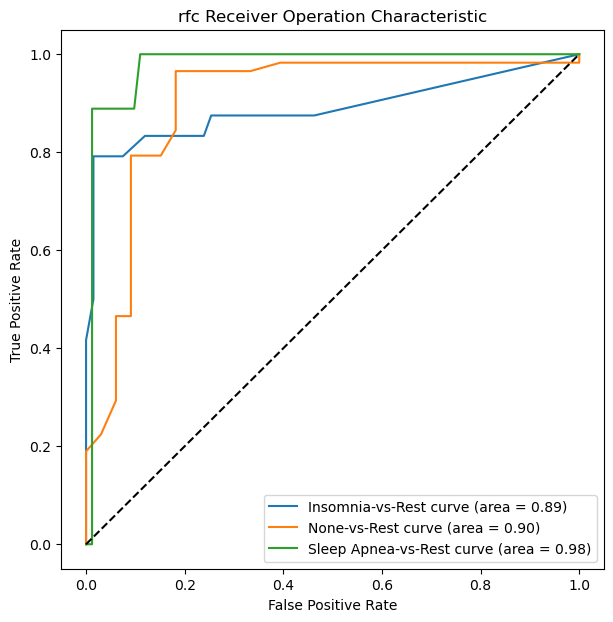

In [90]:
roc_cur = rocAuc(rfc,x_test,y_test,'rfc')

In [91]:
import pickle
with open('rfc_filename.pkl', 'wb') as file:
    pickle.dump(rfc, file)

In [92]:
h_data= pd.read_csv('sleep_health_and_lifestyle_data_test_hidden.csv')

In [93]:
h_data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,291,Female,50,Nurse,6.0,6,90,8,Overweight,140/95,75,10000
1,292,Female,50,Nurse,6.1,6,90,8,Overweight,140/95,75,10000
2,293,Female,50,Nurse,6.1,6,90,8,Overweight,140/95,75,10000
3,294,Female,50,Nurse,6.0,6,90,8,Overweight,140/95,75,10000
4,295,Female,50,Nurse,6.1,6,90,8,Overweight,140/95,75,10000


In [94]:
h_data.drop('Person ID', inplace=True, axis=1)

In [95]:
h_data[['Age','Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level','Heart Rate', 'Daily Steps', 'Blood Pressure']] = \
h_data[['Age','Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level','Heart Rate', 'Daily Steps', 'Blood Pressure']].apply(pd.factorize).iloc[0]

In [96]:
label_en= LabelEncoder()
h_data['Gender'] = label_en.fit_transform(h_data['Gender'])
h_data['Occupation'] = label_en.fit_transform(h_data['Occupation'])
h_data['BMI Category'] = label_en.fit_transform(h_data['BMI Category'])
print(h_data.head())

   Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
0       0    0           3               0                 0   
1       0    0           3               1                 0   
2       0    0           3               1                 0   
3       0    0           3               0                 0   
4       0    0           3               1                 0   

   Physical Activity Level  Stress Level  BMI Category  Blood Pressure  \
0                        0             0             2               0   
1                        0             0             2               0   
2                        0             0             2               0   
3                        0             0             2               0   
4                        0             0             2               0   

   Heart Rate  Daily Steps  
0           0            0  
1           0            0  
2           0            0  
3           0            0  
4           0            

In [97]:
array_without_column_names = h_data.values

In [98]:
predictions= rfc.predict(array_without_column_names)

In [99]:
predictions

array(['None', 'None', 'None', 'None', 'None', 'None', 'None', 'None',
       'None', 'None', 'None', 'None', 'Insomnia', 'Sleep Apnea',
       'Sleep Apnea', 'Sleep Apnea', 'Insomnia', 'Insomnia', 'Insomnia',
       'Insomnia', 'Insomnia', 'Insomnia', 'None', 'None', 'None', 'None',
       'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None',
       'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None',
       'None', 'None', 'None', 'None', 'None', 'None', 'None', 'Insomnia',
       'Insomnia', 'Sleep Apnea', 'Sleep Apnea', 'Insomnia', 'Insomnia',
       'Insomnia', 'Insomnia', 'Insomnia'], dtype=object)

In [100]:
predictions = label_en.fit_transform(predictions)

In [101]:
predictions = pd.DataFrame(predictions)
predictions

,0
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [102]:
predictions.to_csv('Desktop/prediction_Sayed_Ali.csv' , index = False)